# 23andMe - Sales Data Analysis

## Table of Contents
* [Assignment](#Assignment)
* [Data Exploration](#Data-Exploration)
* [Question 1](#Question-1)

### Assignment

1. Plot daily sales for all 50 weeks.
2. It looks like there has been a sudden change in daily sales. What date did it occur?
3. Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?
4. Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).
5. Assume a given day is divided into four dayparts:
     - night (12:00AM - 6:00AM),
     - morning (6:00AM - 12:00PM),
     - afternoon (12:00PM - 6:00PM),
     - evening (6:00PM - 12:00AM),
     
  What is the percentage of sales in each daypart over all 50 weeks?

## Data Exploration

In [24]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

I have 50 CSV files and I want to merge all of them. In Python, the glob module is used similarly to find, locate, and search for all of the files that are present in a system. So, I used glob to merge all CSV files into one file.

In [27]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['sales_week_starting_2013-01-07.csv',
 'sales_week_starting_2012-12-24.csv',
 'sales_week_starting_2012-12-31.csv',
 'sales_week_starting_2013-04-22.csv',
 'sales_week_starting_2012-10-08.csv',
 'sales_week_starting_2012-10-22.csv',
 'sales_week_starting_2013-04-08.csv',
 'sales_week_starting_2013-06-24.csv',
 'sales_week_starting_2013-08-19.csv',
 'sales_week_starting_2013-03-04.csv',
 'sales_week_starting_2013-03-11.csv',
 'sales_week_starting_2013-01-28.csv',
 'sales_week_starting_2013-01-14.csv',
 'sales_week_starting_2013-08-26.csv',
 'sales_week_starting_2013-09-02.csv',
 'sales_week_starting_2013-05-06.csv',
 'sales_week_starting_2012-11-05.csv',
 'sales_week_starting_2013-05-13.csv',
 'sales_week_starting_2013-02-18.csv',
 'sales_week_starting_2013-07-29.csv',
 'sales_week_starting_2013-07-15.csv',
 'sales_week_starting_2013-07-01.csv',
 'sales_week_starting_2012-11-12.csv',
 'sales_week_starting_2013-02-25.csv',
 'sales_week_starting_2013-09-09.csv',
 'sales_week_starting_201

In [28]:
len(csv_files)

50

And then, I want to merge the CSV files. I don't use the merge() function because I want to list day-to-day. So, I used pandas.concat() function.

In [47]:
data_frames = list()

for filename in csv_files:
    data_frames.append(pd.read_csv(filename))
    
data = pd.concat(data_frames, axis = 0)
data

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female
...,...,...
4970,2013-08-18 23:05:04,male
4971,2013-08-18 23:07:48,female
4972,2013-08-18 23:10:08,male
4973,2013-08-18 23:25:14,female


In [48]:
len(data)

204329

## Question 1

1. Plot daily sales for all 50 weeks.

The question is about daily sales. That's why I start to convert the sales_time to a day. Then, I computed the daily sales and gender sales.

In [68]:
sale_day = pd.to_datetime(data['sale_time'])
sale_day.head(3)

0   2013-01-07 02:14:07
1   2013-01-07 02:57:53
2   2013-01-07 02:59:49
Name: sale_time, dtype: datetime64[ns]

In [72]:
daily_sales = sale_day.groupby(sale_day.dt.floor('D')).size().reset_index(name = 'sale_amount')
daily_sales.head(3)

,sale_time,sale_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499


In [80]:
daily_sales.rename(columns = {'sale_time' : 'sale_day'} , inplace = True)
daily_sales.head(3)

,sale_day,sale_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499


In [79]:
daily_sales.describe()

,sale_amount
count,350.000000
mean,583.797143
std,105.152783
min,401.000000
25%,496.000000
50%,546.000000
75%,688.750000
max,801.000000


The mean of sales amount column is around 583, which means the mean of daily sales is around 583. The min and max daily sales are 401 and 801, in order.

In [50]:
gender_sales = data.groupby(data['purchaser_gender']).size().reset_index(name = 'sales_amount')
gender_sales.head(3)

,purchaser_gender,sales_amount
0,female,107740
1,male,96589


<AxesSubplot:title={'center':'Daily sales over 50 weeks'}, xlabel='sale_day'>

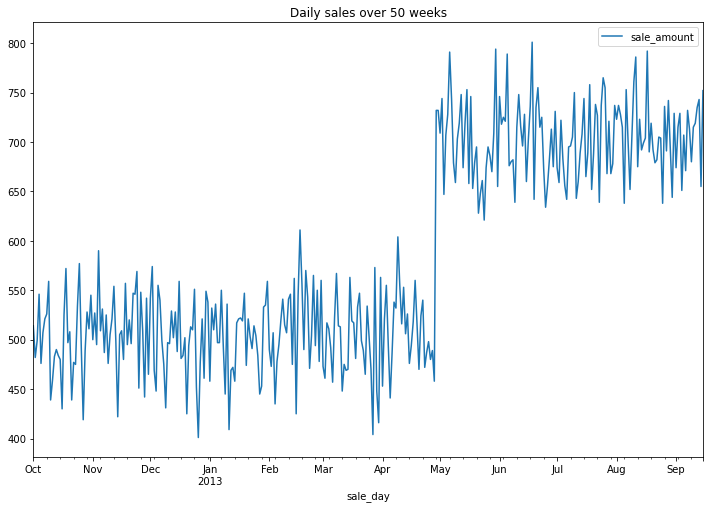

In [94]:
daily_sales.plot(x = 'sale_day', y = 'sale_amount', figsize = (12,8), title = "Daily sales over 50 weeks" )

## Question 2

2. It looks like there has been a sudden change in daily sales. What date did it occur?